In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

from transformers import pipeline
import csv  # Import the CSV module

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px


import plotly.graph_objects as go


## USE csv file to visualise the embeddings of the policies and analyse their similarities

#### Missing values

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_74055/1890291839.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  raw_policies = pd.read_csv("/Users/sofialuk/Desktop/Datathon/Climate+Change/Climate Policies/climate_policies.csv", sep=None)


<Axes: >

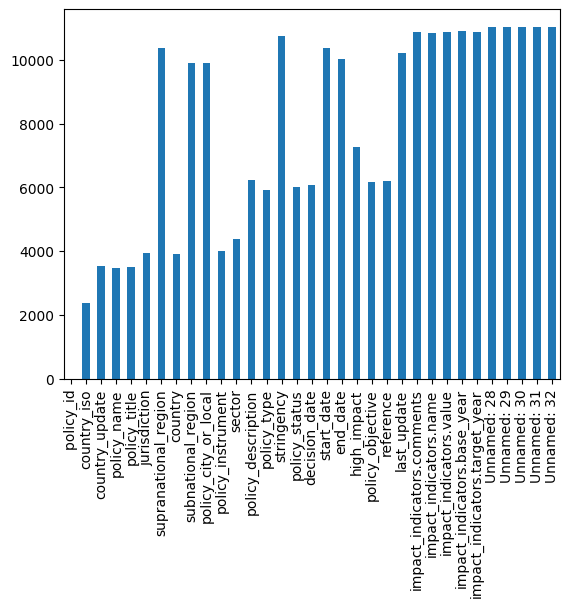

In [4]:
raw_policies = pd.read_csv("/Users/sofialuk/Desktop/Datathon/Climate+Change/Climate Policies/climate_policies.csv", sep=None) 
raw_policies.isna().sum().plot(kind="bar")


In [5]:
policies = pd.read_csv("/Users/sofialuk/Desktop/Datathon/climate_policies_cleaned.csv", sep=None) 

policies.columns

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_74055/1732285453.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  policies = pd.read_csv("/Users/sofialuk/Desktop/Datathon/climate_policies_cleaned.csv", sep=None)


Index(['policy_id', 'country_iso', 'country_update', 'policy_name',
       'policy_title', 'jurisdiction', 'country', 'subnational_region',
       'policy_city_or_local', 'policy_instrument', 'sector',
       'policy_description', 'policy_type', 'stringency', 'policy_status',
       'decision_date', 'start_date', 'end_date', 'high_impact',
       'policy_objective', 'reference', 'last_update',
       'impact_indicators.comments', 'impact_indicators.name',
       'impact_indicators.value', 'impact_indicators.base_year',
       'impact_indicators.target_year'],
      dtype='object')

In [6]:
policies.head(2)

policy_id country_iso country_update                 policy_name  \
0  240306434         ARE         Annual  National Hydrogen Strategy   
1  230206098         KAZ         Annual          Environmental Code   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
1               Environmental Code Kazakhstan (2021)      Country   

                country subnational_region policy_city_or_local  \
0  United Arab Emirates                NaN                  NaN   
1            Kazakhstan                NaN                  NaN   

                            policy_instrument  ... end_date high_impact  \
0          Policy support, Strategic planning  ...   2050.0         NaN   
1  Regulatory Instruments, Obligation schemes  ...      NaN        High   

  policy_objective                                          reference  \
0       Mitigation  https://u.ae/en/about-the-uae/strategies-initi...   
1       Mitigation  https://astanatimes.com/2021/03/new-environmen...   

  last_update  impact_indicators.comments  impact_indicators.name  \
0  26/02/2024                         NaN                     NaN   
1  10/01/2023                         NaN                     NaN   

   impact_indicators.value impact_indicators.base_year  \
0                      NaN                         NaN   
1                      NaN                         NaN   

  impact_indicators.target_year  
0                           NaN  
1                           NaN  

[2 rows x 27 columns]

<Axes: >

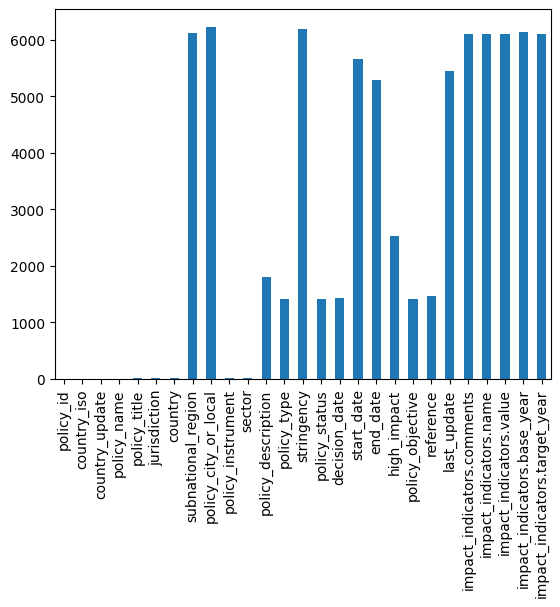

In [7]:
policies.isna().sum().plot(kind="bar")


In [8]:
file_path="/Users/sofialuk/Desktop/Datathon/climate_policies_cleaned.csv"
import pandas as pd

def load_data(file_path):
    # Read CSV into a DataFrame
    data = pd.read_csv(file_path, dtype=str, sep=None)  # Read all columns as strings to avoid type issues

    # Ensure the CSV has enough columns
    if data.shape[1] <= 17:  # Check if there are at least 18 columns (0-based index)
        raise ValueError(f"CSV file has fewer columns than expected: {data.shape[1]} found")

    # Construct the new DataFrame
    new_data = pd.DataFrame({
        "policy_id": data.iloc[:, 0],
        "policy_name": data.iloc[:, 3],
        "country_iso": data.iloc[:, 1],
        "decision_date": data.iloc[:, 16],  
        "start_date": data.iloc[:, 17],  # Column 17 as 'start_date'
        "end_date": data.iloc[:, 18],  


        "policy_description": data.iloc[:, 2:].apply(lambda x: " ".join(x.dropna()), axis=1)  # Join all columns from index 2 onward
    })

    return new_data

data = load_data(file_path)
data

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_74055/3025448863.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, dtype=str, sep=None)  # Read all columns as strings to avoid type issues


policy_id                                        policy_name  \
0     240306434                         National Hydrogen Strategy   
1     230206098                                 Environmental Code   
2     211000945                 Energy Policy Framework (POPE, No.   
3     211003713                                    Electricity Act   
4     211001269             GHGs Formally Designated as Pollutants   
...         ...                                                ...   
6266  211004654                                        Vision 2020   
6267  211001509  Industrial Technologies Program: Industries of...   
6268  211004732  Presidential Order 10/12 which creates the Nat...   
6269  211003684        Domestic Emissions Trading Scheme 2005-2007   
6270  211003485            Alternative and Renewable Energy Policy   

     country_iso decision_date start_date end_date  \
0            ARE          2023       2050      NaN   
1            KAZ           NaN        NaN     High   
2            FRA           NaN        NaN      NaN   
3            BTN           NaN        NaN  Unknown   
4            CAN           NaN        NaN  Unknown   
...          ...           ...        ...      ...   
6266         NGA           NaN       2013  Unknown   
6267         USA           NaN        NaN  Unknown   
6268         AGO           NaN        NaN  Unknown   
6269         NOR           NaN        NaN  Unknown   
6270         PAK           NaN        NaN      NaN   

                                     policy_description  
0     Annual National Hydrogen Strategy National Hyd...  
1     Annual Environmental Code Environmental Code K...  
2     Sporadic Energy Policy Framework (POPE, No. En...  
3     Annual Electricity Act Electricity Act Bhutan ...  
4     Annual GHGs Formally Designated as Pollutants ...  
...                                                 ...  
6266  Annual Vision 2020 Vision 2020 Nigeria (2010) ...  
6267  Annual Industrial Technologies Program: Indust...  
6268  Sporadic Presidential Order 10/12 which create...  
6269  Annual Domestic Emissions Trading Scheme 2005-...  
6270  Sporadic Alternative and Renewable Energy Poli...  

[6271 rows x 7 columns]

In [9]:
data['policy_description'][0]

'Annual National Hydrogen Strategy National Hydrogen Strategy United Arab Emirates (2023) Country United Arab Emirates Policy support, Strategic planning Electricity and heat, Industry, Transport The National Hydrogen Strategy 2050 aims to support low-carbon local industries, contribute to achieving climate neutrality and enhance the UAEs position as one of the largest producers of hydrogen by 2031. The strategy focuses on 10 enablers and outlines the key steps that the UAE will take to accelerate the growth of the hydrogen economy and reduce emissions in highly emission-intensive sectors. Other low-carbon technologies and fuel switch In force 2023 2023 2050 Mitigation https://u.ae/en/about-the-uae/strategies-initiatives-and-awards/strategies-plans-and-visions/environment-and-energy/national-hydrogen-strategy 26/02/2024'

In [10]:
len(data['country_iso'].unique())

199

In [11]:
# Define continent mapping
continent_mapping = {
    "AF": ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CPV", "CMR", "CAF", "TCD", "COM", "COD", "DJI", "EGY", "GNQ", "ERI", "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", "MOZ", "NAM", "NER", "NGA", "RWA", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TZA", "TGO", "TUN", "UGA", "ZMB", "ZWE"],
    "AS": ["AFG", "ARM", "AZE", "BHR", "BGD", "BTN", "BRN", "KHM", "CHN", "CYP", "GEO", "IND", "IDN", "IRN", "IRQ", "ISR", "JPN", "JOR", "KAZ", "KWT", "KGZ", "LAO", "LBN", "MYS", "MDV", "MNG", "MMR", "NPL", "PRK", "OMN", "PAK", "PSE", "PHL", "QAT", "SAU", "SGP", "KOR", "LKA", "SYR", "TJK", "THA", "TLS", "TUR", "TKM", "ARE", "UZB", "VNM", "YEM"],
    "EU": ["ALB", "AND", "AUT", "BLR", "BEL", "BIH", "BGR", "HRV", "CZE", "DNK", "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "LVA", "LIE", "LTU", "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD", "NOR", "POL", "PRT", "ROU", "RUS", "SMR", "SRB", "SVK", "SVN", "ESP", "SWE", "CHE", "UKR", "GBR"],
    "NA": ["ATG", "BHS", "BRB", "BLZ", "CAN", "CRI", "CUB", "DMA", "DOM", "SLV", "GRD", "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN", "KNA", "LCA", "VCT", "TTO", "USA"],
    "OC": ["AUS", "FJI", "KIR", "MHL", "FSM", "NRU", "NZL", "PLW", "PNG", "WSM", "SLB", "TON", "TUV", "VUT"],
    "SA": ["ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GUY", "PRY", "PER", "SUR", "URY", "VEN"]}

# Reverse mapping for easy lookup
country_to_continent = {code: continent for continent, countries in continent_mapping.items() for code in countries}
data["continent"] = data["country_iso"].map(country_to_continent)

### Fit all-MiniLM-L6-v2 and run TSNE

In [12]:
# Generate embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(data['policy_description'].tolist())

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

data['t-SNE 1'] = embeddings_2d[:, 0]
data['t-SNE 2'] = embeddings_2d[:, 1]

## Visualise

In [13]:
# Define marker shapes
unique_countries = data['country_iso'].unique()
shapes = ['circle', 'square', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down', 'star']
shape_map = {country: shapes[i % len(shapes)] for i, country in enumerate(unique_countries)}
data['shape'] = data['country_iso'].map(shape_map)

# Interactive visualization
fig = px.scatter(
    data, x='t-SNE 1', y='t-SNE 2', color='continent', symbol='country_iso',
    hover_data=['country_iso', 'policy_name'], #, 'policy_description'
    title='Policy Description Embeddings Colored by Continent and Shaped by Country'
)

fig.update_layout(legend_title_text='Continent & Country')
fig.show()

#### NDC (Nationally Determined Contributions):

These are the climate action plans submitted by countries under the Paris Agreement
Each country outlines its plans to reduce greenhouse gas emissions and adapt to climate change impacts
NDCs must be updated every 5 years, with each new version expected to be more ambitious than the last
They form the foundation of global climate action under the Paris Agreement

#### INDC (Intended Nationally Determined Contributions):

These were the preliminary climate action plans countries submitted before the Paris Agreement was formally adopted in 2015
Once a country ratified the Paris Agreement, their INDC automatically became their first NDC
The "Intended" part was dropped to reflect the transition from proposed to committed actions
Most INDCs have now been converted to NDCs

#### HFC (Hydrofluorocarbons):

These are industrial chemicals primarily used in refrigeration, air conditioning, and as propellants
They were initially developed to replace ozone-depleting substances (like CFCs) banned under the Montreal Protocol
While HFCs don't damage the ozone layer, they are powerful greenhouse gases with high global warming potentials
The Kigali Amendment to the Montreal Protocol (2016) requires countries to phase down HFC production and consumption
Some HFCs have global warming potentials thousands of times higher than CO2 per unit of mass



NDC (Nationally Determined Contributions):

These are the climate action plans submitted by countries under the Paris Agreement
Each country outlines its plans to reduce greenhouse gas emissions and adapt to climate change impacts
NDCs must be updated every 5 years, with each new version expected to be more ambitious than the last
They form the foundation of global climate action under the Paris Agreement

INDC (Intended Nationally Determined Contributions):

These were the preliminary climate action plans countries submitted before the Paris Agreement was formally adopted in 2015
Once a country ratified the Paris Agreement, their INDC automatically became their first NDC
The "Intended" part was dropped to reflect the transition from proposed to committed actions
Most INDCs have now been converted to NDCs

HFC (Hydrofluorocarbons):

These are industrial chemicals primarily used in refrigeration, air conditioning, and as propellants
They were initially developed to replace ozone-depleting substances (like CFCs) banned under the Montreal Protocol
While HFCs don't damage the ozone layer, they are powerful greenhouse gases with high global warming potentials
The Kigali Amendment to the Montreal Protocol (2016) requires countries to phase down HFC production and consumption
Some HFCs have global warming potentials thousands of times higher than CO2 per unit of mass



## Embedding model benchmarking 

In [40]:
from sentence_transformers import SentenceTransformer

# Load different models for benchmarking
models = {
    "MiniLM": SentenceTransformer('all-MiniLM-L6-v2'),
    "MPNet": SentenceTransformer('all-mpnet-base-v2')}
    


Mask filling is the task of predicting the right word (token to be precise) in the middle of a sequence

Higher similarity → The model generates more coherent embeddings, meaning policies cluster meaningfully.
If ClimateBERT gives the best separation of clusters & high similarity within groups, it may be the best choice. 

In [28]:
# Dictionary to store embeddings and t-SNE results
embeddings_dict = {}

for model_name, model in models.items():
    print(f"Generating embeddings using {model_name}...")
    
    # Compute embeddings
    embeddings = np.array(model.encode(policy_texts, show_progress_bar=True))
    embeddings_dict[model_name] = embeddings

    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Store results in the dataframe
    data[f't-SNE 1 ({model_name})'] = embeddings_2d[:, 0]
    data[f't-SNE 2 ({model_name})'] = embeddings_2d[:, 1]

print("Embeddings and t-SNE visualization coordinates have been added to the dataframe.")

Generating embeddings using MiniLM...


Batches:   0%|          | 0/196 [00:00<?, ?it/s]

Generating embeddings using MPNet...


Batches:   0%|          | 0/196 [00:00<?, ?it/s]

Embeddings and t-SNE visualization coordinates have been added to the dataframe.


In [31]:
import plotly.express as px
import pandas as pd

# Define marker shapes
unique_countries = data['country_iso'].unique()
shapes = ['circle', 'square', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down', 'star']
shape_map = {country: shapes[i % len(shapes)] for i, country in enumerate(unique_countries)}
data['shape'] = data['country_iso'].map(shape_map)

# Generate interactive visualizations for both models
for model_name in models.keys():
    fig = px.scatter(
        data,
        x=f't-SNE 1 ({model_name})',
        y=f't-SNE 2 ({model_name})',
        color='continent',  # Color by continent
        symbol='country_iso',  # Shape by country
        hover_data=['country_iso', 'policy_name'],  # Extra info on hover
        title=f'Policy Description Embeddings ({model_name}) - Colored by Continent & Shaped by Country'
    )

    fig.update_layout(legend_title_text='Continent & Country')
    fig.show()


# Extract embeddings from the zero shot classifyer 

In [47]:
data

policy_id country_iso                                 policy_description
0     240306434         ARE  Annual National Hydrogen Strategy National Hyd...
1     230206098         KAZ  Annual Environmental Code Environmental Code K...
2     211000945         FRA  Sporadic Energy Policy Framework (POPE, No. En...
3     211003713         BTN  Annual Electricity Act Electricity Act Bhutan ...
4     211001269         CAN  Annual GHGs Formally Designated as Pollutants ...
...         ...         ...                                                ...
6266  211004654         NGA  Annual Vision 2020 Vision 2020 Nigeria (2010) ...
6267  211001509         USA  Annual Industrial Technologies Program: Indust...
6268  211004732         AGO  Sporadic Presidential Order 10/12 which create...
6269  211003684         NOR  Annual Domestic Emissions Trading Scheme 2005-...
6270  211003485         PAK  Sporadic Alternative and Renewable Energy Poli...

[6271 rows x 3 columns]

In [68]:
#pip install bertopic

# SIMILARITY ANALYSIS

✅ Network Graph of Similar Policies:
Connects countries with similar policies (embedding-based similarity).
Can be used to identify which policies work best.


Construct a graph where nodes = policies and edges = similarity connections between them. 

##### Overlay Real Climate Outcomes

Fetch real-world climate change data (CO₂ reduction, renewable energy adoption).
Assign an impact score to each policy based on measurable climate improvements.
Color-code or size the nodes based on policy effectiveness.


##### Identify Best Policies from the Graph
✅ A. Centrality: Find the Most Influential Policies
Use PageRank or degree centrality to identify policies that are referenced the most.
High centrality = widely adopted or referenced successful policies.
Example: If Germany’s renewable energy policy is highly connected, it may serve as a best practice for other countries.
✅ B. Community Detection: Identify Clusters of Effective Policies
Apply Louvain clustering or spectral clustering to group similar policies.
Compare these clusters with real-world climate impact data to see which clusters have better outcomes.
Example:
Cluster 1 → Strong carbon pricing policies, high CO₂ reduction.
Cluster 2 → Vague green economy policies, no measurable impact.
This tells us Cluster 1 policies are more effective.
✅ C. Outlier Detection: Spot Ineffective or Unique Policies
If a policy is isolated (few connections), it may be:
Innovative (new and untested but promising).
Ineffective (poorly adopted and showing no impact).
Example: A country with a high-impact, but unique policy might indicate a breakthrough approach that hasn’t been widely adopted yet.


##### Example Use Case
A policymaker wants to draft a new climate bill.
They explore the network graph and see that carbon pricing policies in Cluster 1 have the highest impact.
They check Germany’s and Canada’s policies, which have the most connections.
They use the AI Policy Generator to create a similar policy but tailored to their country’s emissions profile.


# TEMPORAL ANALYSIS

In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import csv

# Define continent mapping
continent_mapping = {
    "AF": ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CPV", "CMR", "CAF", "TCD", "COM", "COD", "DJI", "EGY", "GNQ", "ERI", "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", "MOZ", "NAM", "NER", "NGA", "RWA", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TZA", "TGO", "TUN", "UGA", "ZMB", "ZWE"],
    "AS": ["AFG", "ARM", "AZE", "BHR", "BGD", "BTN", "BRN", "KHM", "CHN", "CYP", "GEO", "IND", "IDN", "IRN", "IRQ", "ISR", "JPN", "JOR", "KAZ", "KWT", "KGZ", "LAO", "LBN", "MYS", "MDV", "MNG", "MMR", "NPL", "PRK", "OMN", "PAK", "PSE", "PHL", "QAT", "SAU", "SGP", "KOR", "LKA", "SYR", "TJK", "THA", "TLS", "TUR", "TKM", "ARE", "UZB", "VNM", "YEM"],
    "EU": ["ALB", "AND", "AUT", "BLR", "BEL", "BIH", "BGR", "HRV", "CZE", "DNK", "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "LVA", "LIE", "LTU", "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD", "NOR", "POL", "PRT", "ROU", "RUS", "SMR", "SRB", "SVK", "SVN", "ESP", "SWE", "CHE", "UKR", "GBR"],
    "NA": ["ATG", "BHS", "BRB", "BLZ", "CAN", "CRI", "CUB", "DMA", "DOM", "SLV", "GRD", "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN", "KNA", "LCA", "VCT", "TTO", "USA"],
    "OC": ["AUS", "FJI", "KIR", "MHL", "FSM", "NRU", "NZL", "PLW", "PNG", "WSM", "SLB", "TON", "TUV", "VUT"],
    "SA": ["ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GUY", "PRY", "PER", "SUR", "URY", "VEN"]
}

# Create reverse mapping for easy lookup
country_to_continent = {
    code: continent 
    for continent, countries in continent_mapping.items() 
    for code in countries
}

# Load different models for benchmarking
models = {
    "MiniLM": SentenceTransformer('all-MiniLM-L6-v2'),
    "MPNet": SentenceTransformer('all-mpnet-base-v2')
}

# Function to load the policy data
def load_data(file_path):
    # Read CSV into a DataFrame
    data = pd.read_csv(file_path, dtype=str, sep=None)

    # Ensure the CSV has enough columns
    if data.shape[1] <= 17:
        raise ValueError(f"CSV file has fewer columns than expected: {data.shape[1]} found")

    # Construct the new DataFrame
    new_data = pd.DataFrame({
        "policy_id": data.iloc[:, 0],
        "policy_name": data.iloc[:, 3],
        "country_iso": data.iloc[:, 1],
        "policy_description": data.iloc[:, 2:].apply(lambda x: " ".join(x.dropna()), axis=1)
    })

    # Add continent information
    new_data["continent"] = new_data["country_iso"].map(country_to_continent)
    
    # Add full continent names
    continent_names = {
        "AF": "Africa",
        "AS": "Asia",
        "EU": "Europe",
        "NA": "North America",
        "OC": "Oceania",
        "SA": "South America"
    }
    new_data["continent_name"] = new_data["continent"].map(continent_names)

    return new_data

# Function to perform similarity analysis, generate embeddings, and apply t-SNE
def similarity_analysis(data, models):
    embeddings_dict = {}
    policy_texts = data["policy_description"].tolist()

    for model_name, model in models.items():
        print(f"Generating embeddings using {model_name}...")
        
        embeddings = np.array(model.encode(policy_texts, show_progress_bar=True))
        embeddings_dict[model_name] = embeddings

        perplexity = min(30, len(embeddings) - 1)
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
        embeddings_2d = tsne.fit_transform(embeddings)

        data[f't-SNE 1 ({model_name})'] = embeddings_2d[:, 0]
        data[f't-SNE 2 ({model_name})'] = embeddings_2d[:, 1]

    print("Embeddings and t-SNE visualization coordinates have been added to the dataframe.")
    return data, embeddings_dict

# Function to visualize the embeddings with Plotly
def visualize_embeddings(data):
    # Define marker shapes based on country_iso
    unique_countries = data['country_iso'].unique()
    shapes = ['circle', 'square', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down', 'star']
    shape_map = {country: shapes[i % len(shapes)] for i, country in enumerate(unique_countries)}
    data['shape'] = data['country_iso'].map(shape_map)

    # Define color scheme for continents
    continent_colors = {
        "Africa": "#E69F00",
        "Asia": "#56B4E9",
        "Europe": "#009E73",
        "North America": "#CC79A7",
        "Oceania": "#F0E442",
        "South America": "#D55E00"
    }

    # Generate interactive visualizations for each model
    for model_name in models.keys():
        fig = px.scatter(
            data,
            x=f't-SNE 1 ({model_name})',
            y=f't-SNE 2 ({model_name})',
            color='continent_name',  # Color by continent
            symbol='country_iso',    # Shape by country
            hover_data=['country_iso', 'policy_id', 'policy_name'],
            title=f'Policy Description Embeddings ({model_name}) - Colored by Continent & Shaped by Country',
            color_discrete_map=continent_colors
        )

        fig.update_layout(
            legend_title_text='Continent & Country',
            width=1000,
            height=800,
            showlegend=True
        )
        
        fig.show()

# Calculate cosine similarity between all pairs of policy descriptions
def calculate_similarity(embeddings_dict):
    for model_name, embeddings in embeddings_dict.items():
        print(f"Calculating cosine similarity for {model_name}...")
        
        similarity_matrix = cosine_similarity(embeddings)
        similarity_df = pd.DataFrame(
            similarity_matrix, 
            columns=[f"policy_{i}" for i in range(len(embeddings))],
            index=[f"policy_{i}" for i in range(len(embeddings))]
        )

        print(f"Cosine similarity matrix for {model_name}:")
        print(similarity_df)

# Example usage
if __name__ == "__main__":
    file_path = "/Users/sofialuk/Desktop/Datathon/climate_policies_cleaned.csv"  # Update with your file path
    data = load_data(file_path)
    
    # Perform similarity analysis and generate embeddings
    data, embeddings_dict = similarity_analysis(data, models)

    # Visualize the embeddings
    visualize_embeddings(data)

    # Calculate and display cosine similarities
    calculate_similarity(embeddings_dict)

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_74055/513217137.py:36: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.



Generating embeddings using MiniLM...


Batches:   0%|          | 0/196 [00:00<?, ?it/s]

Generating embeddings using MPNet...


Batches:   0%|          | 0/196 [00:00<?, ?it/s]

Embeddings and t-SNE visualization coordinates have been added to the dataframe.


Calculating cosine similarity for MiniLM...
Cosine similarity matrix for MiniLM:
             policy_0  policy_1  policy_2  policy_3  policy_4  policy_5  \
policy_0     1.000000  0.367871  0.462849  0.270557  0.283082  0.660251   
policy_1     0.367871  1.000000  0.445792  0.421912  0.420556  0.429118   
policy_2     0.462849  0.445792  1.000000  0.390369  0.414271  0.455399   
policy_3     0.270557  0.421912  0.390369  1.000000  0.306362  0.426470   
policy_4     0.283082  0.420556  0.414271  0.306362  1.000000  0.295980   
...               ...       ...       ...       ...       ...       ...   
policy_6266  0.471683  0.340279  0.475446  0.442517  0.311105  0.614249   
policy_6267  0.383469  0.332102  0.352447  0.369100  0.362690  0.379234   
policy_6268  0.299769  0.343402  0.339483  0.274674  0.284925  0.289619   
policy_6269  0.363428  0.416959  0.463706  0.420652  0.444804  0.421824   
policy_6270  0.468866  0.335298  0.474543  0.543264  0.372537  0.514154   

             polic

In [73]:
import networkx as nx
from itertools import combinations
import plotly.graph_objects as go

def create_similarity_network(data, embeddings_dict):
    for model_name, embeddings in embeddings_dict.items():
        print(f"Creating similarity network for {model_name}...")
        
        # Calculate cosine similarity matrix
        similarity_matrix = cosine_similarity(embeddings)
        
        # Create DataFrame with policy indices
        policy_df = pd.DataFrame({
            'country': data['country_iso'],
            'continent': data['continent_name'],
            'policy_idx': range(len(embeddings))
        })
        
        # Calculate average similarity between countries
        countries = policy_df['country'].unique()
        n_countries = len(countries)
        country_similarities = np.zeros((n_countries, n_countries))
        
        for i, country1 in enumerate(countries):
            for j, country2 in enumerate(countries):
                policies1 = policy_df[policy_df['country'] == country1]['policy_idx'].values
                policies2 = policy_df[policy_df['country'] == country2]['policy_idx'].values
                similarities = similarity_matrix[np.ix_(policies1, policies2)]
                country_similarities[i, j] = np.mean(similarities)
        
        # Create graph
        G = nx.Graph()
        
        # Add nodes with continent information
        for country in countries:
            continent = policy_df[policy_df['country'] == country]['continent'].iloc[0]
            G.add_node(country, continent=continent)
        
        # Store all similarity values for scaling
        all_similarities = []
        
        # For each country, add edges to 5 most similar countries
        for i, country in enumerate(countries):
            similarities = country_similarities[i]
            similarities[i] = -1  # Exclude self-similarity
            most_similar_idx = np.argsort(similarities)[-5:]
            
            for idx in most_similar_idx:
                if similarities[idx] > 0:
                    G.add_edge(country, countries[idx], weight=similarities[idx])
                    all_similarities.append(similarities[idx])
        
        # Calculate min and max similarities for edge width scaling
        min_sim = min(all_similarities)
        max_sim = max(all_similarities)
        
        # Function to scale edge width based on similarity
        def scale_edge_width(similarity):
            # Scale width between 0.5 and 5 based on similarity
            return 0.5 + 4.5 * (similarity - min_sim) / (max_sim - min_sim)
        
        # Use force-directed layout
        pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)
        
        # Define colors for continents
        continent_colors = {
            'Europe': '#1f77b4',
            'Asia': '#ff7f0e',
            'Africa': '#2ca02c',
            'North America': '#d62728',
            'South America': '#9467bd',
            'Oceania': '#17becf'
        }
        
        # Create separate edge traces for different widths
        edge_traces = []
        
        for edge in G.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            weight = G.edges[edge]['weight']
            width = scale_edge_width(weight)
            
            edge_trace = go.Scatter(
                x=[x0, x1, None],
                y=[y0, y1, None],
                line=dict(width=width, color='#888'),
                hoverinfo='text',
                text=[f"{edge[0]} → {edge[1]}<br>Similarity: {weight:.3f}", "", ""],
                mode='lines',
                showlegend=False
            )
            edge_traces.append(edge_trace)
        
        # Create node trace
        node_x = []
        node_y = []
        node_colors = []
        node_texts = []
        
        for node in G.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            continent = G.nodes[node]['continent']
            node_colors.append(continent_colors.get(continent, '#808080'))
            
            # Create hover text with connected countries, sorted by similarity
            connected = [(neighbor, G.edges[node, neighbor]['weight'])
                        for neighbor in G.neighbors(node)]
            connected.sort(key=lambda x: x[1], reverse=True)
            connected_text = '<br>'.join(
                f"{country} (similarity: {sim:.3f})"
                for country, sim in connected
            )
            node_texts.append(
                f"Country: {node}<br>Continent: {continent}<br><br>Most similar to:<br>{connected_text}"
            )
        
        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            hoverinfo='text',
            text=list(G.nodes()),
            textposition="top center",
            hovertext=node_texts,
            marker=dict(
                size=10,
                color=node_colors,
                line_width=2
            )
        )
        
        # Create figure with all traces
        fig = go.Figure(
            data=[*edge_traces, node_trace],
            layout=go.Layout(
                title=dict(
                    text=f'Policy Similarity Network ({model_name}) - Top 5 Connections per Country',
                    x=0.5,
                    y=0.95
                ),
                showlegend=True,
                hovermode='closest',
                margin=dict(b=20, l=5, r=5, t=40),
                width=1200,
                height=800,
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
            )
        )
        
        # Add legend for continents
        for continent, color in continent_colors.items():
            fig.add_trace(go.Scatter(
                x=[None],
                y=[None],
                mode='markers',
                marker=dict(size=10, color=color),
                name=continent,
                showlegend=True
            ))
        
        # Add legend for edge widths
        for width in [0.5, 2.5, 4.5]:
            sim = (width - 0.5) * (max_sim - min_sim) / 4.5 + min_sim
            fig.add_trace(go.Scatter(
                x=[None],
                y=[None],
                mode='lines',
                line=dict(width=width, color='#888'),
                name=f'Similarity: {sim:.2f}',
                showlegend=True
            ))
        
        fig.show()

# Example usage:
#data = load_data(file_path)
# data, embeddings_dict = similarity_analysis(data, models)

create_similarity_network(data, embeddings_dict)

Creating similarity network for MiniLM...


Creating similarity network for MPNet...


In [70]:
# cd 
#  ! git clone git@github.com:mkrunic/KULdatathon2025.git

Cloning into 'KULdatathon2025'...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Enter passphrase for key '/Users/sofialuk/.ssh/id_ed25519': 

# Summarize 

In [96]:
topics = pd.read_csv('/Users/sofialuk/Desktop/Datathon/topic_scores_output-2.csv', sep=';')

In [ ]:
data

In [108]:
# Group by country_iso and concatenate policy_descriptions
concatenated_policies = data.groupby('country_iso')['policy_description'].apply(' '.join).reset_index()

# To make it cleaner, you might want to add some formatting
# This will add a separator between policies
concatenated_policies = data.groupby('country_iso')['policy_description'].apply(lambda x: ' | '.join(x)).reset_index()

# To view results for a specific country (e.g. KAZ):
kaz_policies = concatenated_policies[concatenated_policies['country_iso'] == 'KAZ']['policy_description'].iloc[0]
print(kaz_policies)

Annual Environmental Code Environmental Code Kazakhstan (2021) Country Kazakhstan Regulatory Instruments, Obligation schemes General The code regulates activities which may have an impact on the environment. It includes regulations related to GHG emissions among others. For emissions, it establishes a mandate for the country's biggest polluters to adopt best available technologies. Energy service demand reduction and resource efficiency, Renewables In force 2021 High Mitigation https://astanatimes.com/2021/03/new-environmental-code-in-kazakhstan-to-promote-green-technology-sustainable-development/ 10/01/2023 | Annual Intended Nationally Determined Contribution - INDC Intended Nationally Determined Contribution - INDC Kazakhstan (2015) Country Kazakhstan GHG reduction target, Political & non-binding GHG reduction target General Economy-wide target of 15%-25% reduction in greenhouse gas emissions by 2030 compared to 1990. | Annual Law on the transition to green economy Law on the transit

concatenated_policies

In [ ]:
concatenated_policies = concatenated_policies[concatenated_policies.country_iso != "420"]
concatenated_policies['policy_description']

country_iso                                 policy_description
1           AFG  Sporadic Five-year plan Five-year plan Afghani...
2           AGO  Sporadic Nationally Determined Contribution - ...
3           ALB  Sporadic Nationally Determined Contribution - ...
4           AND  Sporadic Nationally Determined Contribution - ...
5           ARE  Annual National Hydrogen Strategy National Hyd...
..          ...                                                ...
194         WSM  Sporadic National policy on combating climate ...
195         YEM  Sporadic Intended Nationally Determined Contri...
196         ZAF  Annual Integrated National Electrification Pro...
197         ZMB  Sporadic The Forests Act The Forests Act Zambi...
198         ZWE  Sporadic Environmental Management Act (EMA), A...

[198 rows x 2 columns]

In [130]:
from transformers import pipeline
import pandas as pd

def split_into_chunks(text, max_chunk_size=500):
    """
    Split text into chunks using policies as primary boundaries
    """
    # First split by policies (pipe separator)
    policies = text.split(" | ")
    chunks = []
    current_chunk = []
    current_length = 0
    
    for policy in policies:
        policy = policy.strip()
        policy_length = len(policy.split())
        
        # If a single policy is too long, split it by sentences
        if policy_length > max_chunk_size:
            if current_chunk:
                chunks.append(" | ".join(current_chunk))
                current_chunk = []
                current_length = 0
                
            # Split long policy into sentences
            sentences = policy.split(". ")
            temp_chunk = []
            temp_length = 0
            
            for sentence in sentences:
                sentence = sentence.strip() + "."
                sentence_length = len(sentence.split())
                
                if temp_length + sentence_length > max_chunk_size:
                    if temp_chunk:
                        chunks.append(" ".join(temp_chunk))
                    temp_chunk = [sentence]
                    temp_length = sentence_length
                else:
                    temp_chunk.append(sentence)
                    temp_length += sentence_length
                    
            if temp_chunk:
                chunks.append(" ".join(temp_chunk))
                
        # If adding this policy would exceed chunk size, start a new chunk
        elif current_length + policy_length > max_chunk_size:
            chunks.append(" | ".join(current_chunk))
            current_chunk = [policy]
            current_length = policy_length
        else:
            current_chunk.append(policy)
            current_length += policy_length
    
    # Add the last chunk if it exists
    if current_chunk:
        chunks.append(" | ".join(current_chunk))
    
    return chunks

def summarize_with_chunks(text, summarizer, max_chunk_size=500):
    """
    Summarize text by breaking it into policy-aware chunks
    """
    try:
        chunks = split_into_chunks(text, max_chunk_size)
        
        # If text is short enough, summarize directly
        if len(chunks) == 1:
            summary = summarizer(chunks[0], max_length=130, min_length=30, do_sample=False)[0]['summary_text']
            return summary
        
        # Summarize each chunk
        chunk_summaries = []
        for chunk in chunks:
            if len(chunk.strip()) > 10:
                chunk_summary = summarizer(chunk, max_length=100, min_length=20, do_sample=False)[0]['summary_text']
                chunk_summaries.append(chunk_summary)
        
        # Combine chunk summaries and create final summary
        combined_summary = " | ".join(chunk_summaries)
        final_summary = summarizer(combined_summary, max_length=130, min_length=30, do_sample=False)[0]['summary_text']
        
        return final_summary
    
    except Exception as e:
        return f"Error summarizing text: {str(e)}"

def summarize_policies(df):
    # Initialize the summarization pipeline
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    
    # Concatenate policies by country
    concatenated_policies = df.groupby('country_iso')['policy_description'].apply(' | '.join).reset_index()
    
    # Apply summarization
    concatenated_policies['policy_summary'] = concatenated_policies['policy_description'].apply(
        lambda x: summarize_with_chunks(x, summarizer)
    )
    
    # Merge summaries back
    df_with_summaries = df.merge(
        concatenated_policies[['country_iso', 'policy_summary']], 
        on='country_iso', 
        how='left'
    )
    
    return df_with_summaries

In [147]:
# Apply the function
df_summarized = summarize_policies(data)

Device set to use mps:0
Your max_length is set to 130, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 130, but your input_length is only 124. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)
Your max_length is set to 100, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 100, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('.

In [149]:
df_summarized

policy_id                                        policy_name  \
0     240306434                         National Hydrogen Strategy   
1     230206098                                 Environmental Code   
2     211000945                 Energy Policy Framework (POPE, No.   
3     211003713                                    Electricity Act   
4     211001269             GHGs Formally Designated as Pollutants   
...         ...                                                ...   
6266  211004654                                        Vision 2020   
6267  211001509  Industrial Technologies Program: Industries of...   
6268  211004732  Presidential Order 10/12 which creates the Nat...   
6269  211003684        Domestic Emissions Trading Scheme 2005-2007   
6270  211003485            Alternative and Renewable Energy Policy   

     country_iso                                 policy_description continent  \
0            ARE  Annual National Hydrogen Strategy National Hyd...        AS   
1            KAZ  Annual Environmental Code Environmental Code K...        AS   
2            FRA  Sporadic Energy Policy Framework (POPE, No. En...        EU   
3            BTN  Annual Electricity Act Electricity Act Bhutan ...        AS   
4            CAN  Annual GHGs Formally Designated as Pollutants ...        NA   
...          ...                                                ...       ...   
6266         NGA  Annual Vision 2020 Vision 2020 Nigeria (2010) ...        AF   
6267         USA  Annual Industrial Technologies Program: Indust...        NA   
6268         AGO  Sporadic Presidential Order 10/12 which create...        AF   
6269         NOR  Annual Domestic Emissions Trading Scheme 2005-...        EU   
6270         PAK  Sporadic Alternative and Renewable Energy Poli...        AS   

     continent_name  t-SNE 1 (MiniLM)  t-SNE 2 (MiniLM)  t-SNE 1 (MPNet)  \
0              Asia          4.391857          6.631790        16.533676   
1              Asia         13.892438        -13.873408       -27.012922   
2            Europe         -5.222323        -66.254066       -40.836391   
3              Asia         28.326389         50.277443         8.395242   
4     North America        -69.134254          4.893015        48.051037   
...             ...               ...               ...              ...   
6266         Africa         25.097313         21.109318        -8.609392   
6267  North America        -43.389782         -1.600113        31.848490   
6268         Africa         43.197536         -4.705421       -27.023125   
6269         Europe          5.018884        -35.469875       -17.607431   
6270           Asia          7.990614         11.879236        -3.214395   

      t-SNE 2 (MPNet)          shape  \
0           57.265804         circle   
1          -10.035827         square   
2           49.621498        diamond   
3          -62.792522          cross   
4           37.744881              x   
...               ...            ...   
6266       -49.510509          cross   
6267         0.373245  triangle-down   
6268       -45.352650    triangle-up   
6269        27.671579    triangle-up   
6270       -38.365540              x   

                                         policy_summary  
0     The National Hydrogen Strategy 2050 aims to su...  
1     Kazakhstan's NDC confirms its INDC target of a...  
2     France's National Low-Carbon Strategy (SNBC) i...  
3     Bhutan is a net sink for greenhouse gases. The...  
4     Canada's Greenhouse Gas (GHG) Offset Credit Sy...  
...                                                 ...  
6266  The 2050 Agenda is the long-term plan for the ...  
6267  The U.S. government has set a target for the f...  
6268  Angola plans to reduce GHG emissions up to 35%...  
6269  Norway has a legally binding GHG reduction tar...  
6270  Pakistan intends to set a cumulative ambitious...  

[6271 rows x 12 columns]

In [172]:
df_summarized.to_csv('df_summarized.csv')

#  ALL SUMMARIES PER COUNTRY


In [131]:
df_summarized_grouped_by_country = summarize_policies(concatenated_policies)

Device set to use mps:0


In [143]:
print('policy length before summarisation for country {} : '.format(df_summarized_grouped_by_country['country_iso'][0]), len(df_summarized_grouped_by_country['policy_description'][0]))

print('Full concatenated policy text for country {} : '.format(df_summarized_grouped_by_country['country_iso'][0]), df_summarized_grouped_by_country['policy_description'][0])

print('policy length after summarisation for country {} : '.format(df_summarized_grouped_by_country['country_iso'][0]), len(df_summarized_grouped_by_country['policy_summary'][0]))
print('Summarized concatenated policy text for country {} : '.format(df_summarized_grouped_by_country['country_iso'][0]), df_summarized_grouped_by_country['policy_summary'][0])


policy length before summarisation for country AFG :  744
Full concatenated policy text for country AFG :  Sporadic Five-year plan Five-year plan Afghanistan (2014) Country Afghanistan Target, Renewable energy target, Political & non-binding renewable energy target Electricity and heat, Renewables 500 megawatts of power is to be generated from renewable sources by 2020 in keeping with the five-year plan. Renewables Ended 2014 2020 Unknown Energy security, Mitigation, Energy access https://www.globalissues.org/news/2014/02/13/18230 | Sporadic Intended Nationally Determined Contribution - INDC Intended Nationally Determined Contribution - INDC Afghanistan (2015) Country Afghanistan Target, GHG reduction target, Political & non-binding GHG reduction target General There will be a 13.6% reduction in GHG emissions by 2030 compared to a business
policy length after summarisation for country AFG :  154
Summarized concatenated policy text for country AFG :  500 megawatts of power is to be gene

In [148]:
df_summarized.to_csv('data_summary.csv')
df_summarized_grouped_by_country.to_csv('concatenated_policies_summary.csv') 

In [145]:
df_summarized_grouped_by_country.head(20)

country_iso                                 policy_description  \
0          AFG  Sporadic Five-year plan Five-year plan Afghani...   
1          AGO  Sporadic Nationally Determined Contribution - ...   
2          ALB  Sporadic Nationally Determined Contribution - ...   
3          AND  Sporadic Nationally Determined Contribution - ...   
4          ARE  Annual National Hydrogen Strategy National Hyd...   
5          ARG  Annual Provision 3/2018 as part of resolution ...   
6          ARM  Sporadic Kigali Amendment on HFCs Kigali Amend...   
7          ATG  Sporadic Nationally Determined Contribution - ...   
8          AUS  Annual Greenhouse Accounting Project/Co-operat...   
9          AUT  Sporadic Environmental Support Act Environment...   
10         AZE  Sporadic Nationally Determined Contribution - ...   
11         BDI  Sporadic Intended Nationally Determined Contri...   
12         BEL  Sporadic Minimum Requirement for Roof Insulati...   
13         BEN  Sporadic Decree No. 2003-142 on the establishm...   
14         BFA  Sporadic Kigali Amendment on HFCs Kigali Amend...   
15         BGD  Sporadic The Climate Change Trust Fund Act The...   
16         BGR  Sporadic Ordinance on the Vocational Education...   
17         BHR  Sporadic Nationally Determined Contribution - ...   
18         BHS  Sporadic National Climate Change Adaptation Po...   
19         BIH  Sporadic Kigali Amendment on HFCs Kigali Amend...   

                                       policy_summary  
0   500 megawatts of power is to be generated from...  
1   Angola plans to reduce GHG emissions up to 35%...  
2   Albania's NDC includes a commitment to reduce ...  
3   Andorra’s NDC does not set a stronger commitme...  
4   The National Hydrogen Strategy 2050 aims to su...  
5   Argentina has a national program for efficient...  
6   Armenia is rich in renewable energy sources an...  
7   The NDC of Antigua and Barbuda focuses on adap...  
8   The Australian Government will work with the c...  
9   The national emission target for Austria under...  
10  Azerbaijan's new NDC maintains its previous ta...  
11   Updated NDC maintains unconditional reduction...  
12  The national emission target for Belgium under...  
13  Benin's updated NDC sets out a target of cumul...  
14  Burkina Faso's National White Paper for 2020 s...  
15  Bangladesh aims to unconditionally reduce its ...  
16  Bulgaria has a national emissions target under...  
17  NDC Bahrain (2021) Country Bahrain Policy supp...  
18  The Bahamas will focus on the development of i...  
19  Bosnia and Herzegovina’s NDC proposes an econo...

In [171]:
df_summarized_grouped_by_country.to_csv('df_summarized_grouped_by_country.csv')

In [ ]:
i = 12 

print('policy length before summarisation for country {} : '.format(df_summarized_grouped_by_country['country_iso'][i]), len(df_summarized_grouped_by_country['policy_description'][i]))
print('Full concatenated policy text for country {} : '.format(df_summarized_grouped_by_country['country_iso'][i]), df_summarized_grouped_by_country['policy_description'][i])

print('policy length after summarisation for country {} : '.format(df_summarized_grouped_by_country['country_iso'][i]), len(df_summarized_grouped_by_country['policy_summary'][i]))
print('Summarized concatenated policy text for country {} : '.format(df_summarized_grouped_by_country['country_iso'][i]), df_summarized_grouped_by_country['policy_summary'][i])


policy length before summarisation for country BEL :  70633
Full concatenated policy text for country BEL :  Sporadic Minimum Requirement for Roof Insulation in Rental Residential Buildings (Flanders) Minimum Requirement for Roof Insulation in Rental Residential Buildings (Flanders) Belgium (2015) Subnational region Belgium Flanders Building codes and standards Buildings, Heating and cooling A new standard introduced in Flanders, Belgium in January 2015 sets a minimum requirement for roof insulation in residential buildings, applied when the home is rented out. If a residential building does not meet the minimum requirements, it receives penalty points. From 2020 if a building or apartment receives more than 15 penalty points, the building will be ineligible for renting. IEA/IRENA Global Renewable Energy Policies and Measures Database © OECD/IEA and IRENA, [November 2020] Energy efficiency In force 2015 Unknown Mitigation https://www.iea.org/policies/8504-minimum-requirement-for-roof-i

In [139]:
len(df_summarized_grouped_by_country['policy_summary'][0])

154

In [136]:
df_summarized_grouped_by_country

country_iso                                 policy_description  \
0           AFG  Sporadic Five-year plan Five-year plan Afghani...   
1           AGO  Sporadic Nationally Determined Contribution - ...   
2           ALB  Sporadic Nationally Determined Contribution - ...   
3           AND  Sporadic Nationally Determined Contribution - ...   
4           ARE  Annual National Hydrogen Strategy National Hyd...   
..          ...                                                ...   
193         WSM  Sporadic National policy on combating climate ...   
194         YEM  Sporadic Intended Nationally Determined Contri...   
195         ZAF  Annual Integrated National Electrification Pro...   
196         ZMB  Sporadic The Forests Act The Forests Act Zambi...   
197         ZWE  Sporadic Environmental Management Act (EMA), A...   

                                        policy_summary  
0    500 megawatts of power is to be generated from...  
1    Angola plans to reduce GHG emissions up to 35%...  
2    Albania's NDC includes a commitment to reduce ...  
3    Andorra’s NDC does not set a stronger commitme...  
4    The National Hydrogen Strategy 2050 aims to su...  
..                                                 ...  
193  Samoa is committed to reducing its GHG emissio...  
194  Yemen has a target of 1 percent reduction in G...  
195  South Africa has almost exclusively dealt with...  
196  Vision 2030 is a long-term perspective plan ai...  
197  With the ratification of the Kigali Amendment,...  

[198 rows x 3 columns]

In [ ]:
print(len(df_summarized['policy_summary'][6270]))
print(df_summarized['policy_summary'][6270])

print(len(df_summarized['policy_description'][6270]))

print(df_summarized['policy_description'][6270])


247
Pakistan intends to set a cumulative ambitious conditional target of overall 50% reduction of its projected emissions by 2030. Pakistan’s environmental policy and management framework is based on the Pakistan Environment Protection Act 1997 (PEPA)
467
Sporadic Alternative and Renewable Energy Policy Alternative and Renewable Energy Policy Pakistan (2006) Country Pakistan Feed-in tariffs or premiums, Tax relief, Strategic planning, Regulatory Instruments Electricity and heat, Renewables superseded by Medium term policy 2011 Renewables Superseded 2006 Mitigation http://climateinfo.pk/frontend/web/attachments/data-type/MoWP_AEDB%20(2011)%20Alternative%20and%20Renewable%20Energy%20Policy%20-%20Midterm%20Policy.pdf


In [152]:
# To make it cleaner, you might want to add some formatting
# This will add a separator between policies
concatenated_summaries = df_summarized.groupby('country_iso')['policy_summary'].apply(lambda x: ' | '.join(x)).reset_index()

In [169]:
concatenated_summaries = concatenated_summaries.rename(columns={"policy_summary" : 'policy_description'})
concatenated_summaries

country_iso                                 policy_description
1           AFG  500 megawatts of power is to be generated from...
2           AGO  Angola plans to reduce GHG emissions up to 35%...
3           ALB  Albania's NDC includes a commitment to reduce ...
4           AND  Andorra’s NDC does not set a stronger commitme...
5           ARE  The National Hydrogen Strategy 2050 aims to su...
..          ...                                                ...
194         WSM  Samoa is committed to reducing its GHG emissio...
195         YEM  Yemen has a target of 1 percent reduction in G...
196         ZAF  South Africa has almost exclusively dealt with...
197         ZMB  Vision 2030 is a long-term perspective plan ai...
198         ZWE  With the ratification of the Kigali Amendment,...

[198 rows x 2 columns]

In [ ]:
concatenated_summaries['policy_description'][0]

In [173]:
concatenated_summaries_per_country = summarize_policies(concatenated_summaries)

Device set to use mps:0
Your max_length is set to 130, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Your max_length is set to 130, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 130, but your input_length is only 129. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)
Your max_length is set to 130, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer

In [174]:
concatenated_summaries_per_country.to_csv('concatenated_summaries_per_country.csv')

In [175]:
concatenated_summaries_per_country

country_iso                                 policy_description  \
0           AFG  500 megawatts of power is to be generated from...   
1           AGO  Angola plans to reduce GHG emissions up to 35%...   
2           ALB  Albania's NDC includes a commitment to reduce ...   
3           AND  Andorra’s NDC does not set a stronger commitme...   
4           ARE  The National Hydrogen Strategy 2050 aims to su...   
..          ...                                                ...   
193         WSM  Samoa is committed to reducing its GHG emissio...   
194         YEM  Yemen has a target of 1 percent reduction in G...   
195         ZAF  South Africa has almost exclusively dealt with...   
196         ZMB  Vision 2030 is a long-term perspective plan ai...   
197         ZWE  With the ratification of the Kigali Amendment,...   

                                        policy_summary  
0    500 megawatts of power is to be generated from...  
1    Angola plans to reduce GHG emissions up to 35%...  
2    The indicative saving target given by the NEEA...  
3    Andorra’s NDC does not set a stronger commitme...  
4    The National Hydrogen Strategy 2050 aims to su...  
..                                                 ...  
193  Samoa is committed to reducing its GHG emissio...  
194  Yemen has a target of 1 percent reduction in G...  
195  South Africa has almost exclusively dealt with...  
196  Vision 2030 is a long-term perspective plan ai...  
197  Zimbabwe has several investment incentives thr...  

[198 rows x 3 columns]

In [179]:
i = 12 

print('policy length before summarisation for country {} : '.format(concatenated_summaries_per_country['country_iso'][i]), len(concatenated_summaries_per_country['policy_description'][i]))
print('Full concatenated policy text for country {} : '.format(concatenated_summaries_per_country['country_iso'][i]), concatenated_summaries_per_country['policy_description'][i])

print('policy length after summarisation for country {} : '.format(concatenated_summaries_per_country['country_iso'][i]), len(concatenated_summaries_per_country['policy_summary'][i]))
print('Summarized concatenated policy text for country {} : '.format(concatenated_summaries_per_country['country_iso'][i]), concatenated_summaries_per_country['policy_summary'][i])


policy length before summarisation for country BEL :  34317
Full concatenated policy text for country BEL :  The national emission target for Belgium under the EU Effort Sharing Decision is 15% reduction of greenhouse gas emissions in 2020 compared to 2005 level. A new standard introduced in Flanders, Belgium in January 2015 sets a minimum requirement for roof insulation in residential buildings. Wallonia continues to conclude covenants on energy efficiency with different industrial sectors. | The national emission target for Belgium under the EU Effort Sharing Decision is 15% reduction of greenhouse gas emissions in 2020 compared to 2005 level. A new standard introduced in Flanders, Belgium in January 2015 sets a minimum requirement for roof insulation in residential buildings. Wallonia continues to conclude covenants on energy efficiency with different industrial sectors. | The national emission target for Belgium under the EU Effort Sharing Decision is 15% reduction of greenhouse ga

In [ ]:
Summarized concatenated policy text for country BEL :  The national emission target for Belgium under the EU Effort Sharing Decision is 15% reduction of greenhouse gas emissions in 2020 compared to 2005 level. A new standard introduced in Flanders, Belgium in January 2015 sets a minimum requirement for roof insulation in residential buildings. Wallonia continues to conclude covenants on energy efficiency with different industrial sectors.
Summarized concatenated policy text for country BEL :  The national emission target for Belgium under the EU Effort Sharing Decision is 15% reduction of greenhouse gas emissions in 2020 compared to 2005 level. A new standard introduced in Flanders, Belgium in January 2015 sets a minimum requirement for roof insulation in residential buildings.